In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [4]:
def load_mnist():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape(-1, 784)
    x_train = x_train / 255.0
    x_test = x_test.reshape(-1, 784)
    x_test = x_test / 255.0
    return x_train, y_train, x_test, y_test

In [5]:
def one_hot(labels):
    num_classes = np.max(labels) + 1
    encoded_labels = np.eye(num_classes)[labels]
    return encoded_labels

In [99]:
class NeuralNetwork:

    def __init__(self):
        self.hidden_units = 256
        self.num_classes = 10
        self.learning_rate = 0.01
        self.steps = 100

        self.W1 = np.random.randn(784, self.hidden_units) * 0.01
        self.b1 = np.random.randn(self.hidden_units)
        self.W2 = np.random.randn(self.hidden_units, self.num_classes) * 0.01
        self.b2 = np.random.randn(self.num_classes)

        self.loss_history = np.zeros(self.steps)

    def softmax(self, z):
        exp = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp / np.sum(exp, axis=1, keepdims=True)

    def relu(self, z):
        return np.maximum(0, z)

    def d_relu(self, z):
        return np.array(z > 0, dtype = np.float32)

    def forward(self, X):
        z1 = np.dot(X, self.W1) + self.b1
        a1 = self.relu(z1)

        z2 = np.dot(a1, self.W2) + self.b2
        prob = self.softmax(z2)

        return prob, a1

    def loss(self, X, y):
        prob, a1 = self.forward(X)
        m = y.shape[0]
        loss = -np.sum(y * np.log(prob + 1e-8)) / m
        return loss

    def train(self, X, y):
        m = X.shape[0]
        
        for i in range(self.steps):
            prob, a1 = self.forward(X)

            dZ2 = prob - y
            dW2 = np.dot(a1.T, dZ2) / m
            db2 = np.mean(dZ2, axis=0)
            dZ1 = np.dot(dZ2, self.W2.T) * self.d_relu(a1)
            dW1 = np.dot(X.T, dZ1) / m
            db1 = np.mean(dZ1, axis=0)

            self.W2 -= self.learning_rate * dW2
            self.b2 -= self.learning_rate * db2
            self.W1 -= self.learning_rate * dW1
            self.b1 -= self.learning_rate * db1

            loss = self.loss(X, y)
            self.loss_history[i] = loss
    
    def predict(self, X):
        probabilities, a1  = self.forward(X)
        predictions = np.argmax(probabilities, axis=1)
        return predictions
    
    def accuracy(self, X, y):
        prob, a1 = self.forward(X)
        pred = np.argmax(prob, 1)
        y1 = np.argmax(y, 1)
        accuracy = np.mean(pred == y1)
        return accuracy

    

In [86]:
model = NeuralNetwork()

x_train, y_train, x_test, y_test = load_mnist()
y1 = y_train
y_train = one_hot(y_train)
y2 = y_test
y_test = one_hot(y_test)

In [100]:
model.train(x_train, y_train)

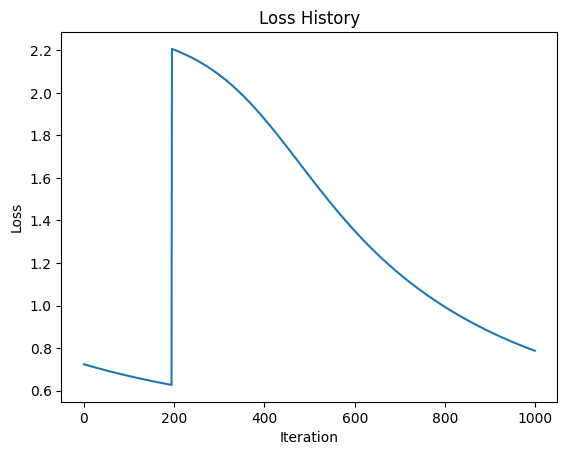

In [97]:
plt.plot(range(len(model.loss_history)), model.loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss History')
plt.show()

In [98]:
model.accuracy(x_test, y_test)

0.852